In [3]:
# pip install opencv-python
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pickle

Hier werden wir ein Beispielbild für je einen Hund und eine Katze anpassen.

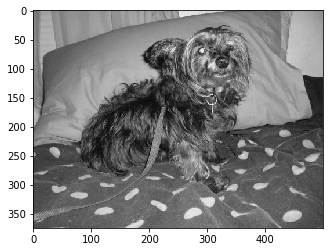

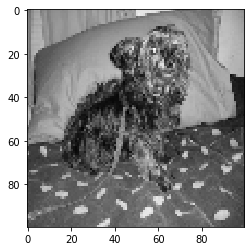

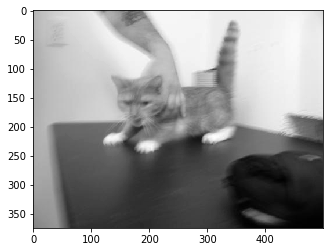

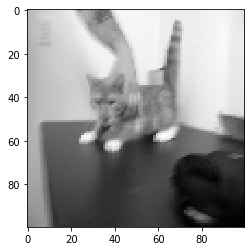

In [31]:
DATADIR = 'PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
#     print(path)
    img_path = os.listdir(path)[0]
#     print(img_path)
    img = cv2.imread(os.path.join(path, img_path), cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, cmap= 'gray')
    plt.show()
    
    IMG_SIZE = 100
    
    new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))    
    
    plt.imshow(new_img, cmap= 'gray')
    plt.show()

In [39]:
img_np = np.mean(plt.imread(os.path.join(path, img_path)), -1)

# plt.imshow(img_np, cmap = 'gray')
# plt.show()

%timeit cv2.imread(os.path.join(path, img_path), cv2.IMREAD_GRAYSCALE)
%timeit np.mean(plt.imread(os.path.join(path, img_path)), -1)

1.25 ms ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.2 ms ± 387 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<h1>Hier startet das Preprocessing</h1>

In [49]:
def create_training_data():
    DATADIR = 'PetImages'
    CATEGORIES = ['Dog', 'Cat']
    IMG_SIZE = 100
    
    data = []
    target = []
    
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            
            try:
                img_array = cv2.imread(os.path.join(path,img),
                                      cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array,
                                      (IMG_SIZE, IMG_SIZE))
                
                data.append(img_array)
                target.append(class_num)
                
            except Exception as e:
                print(e)
#                 pass
    
    return shuffle(np.asarray(data), np.asarray(target))

In [50]:
X, y = create_training_data()

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\s

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



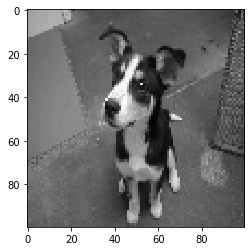

Category: 0


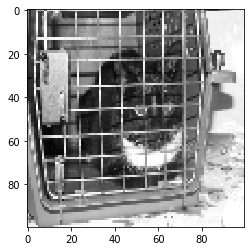

Category: 1


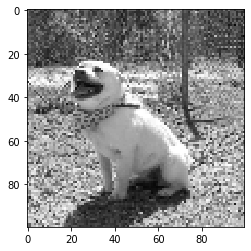

Category: 0


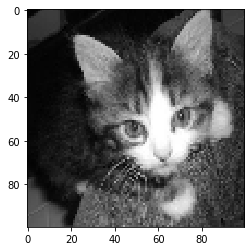

Category: 1


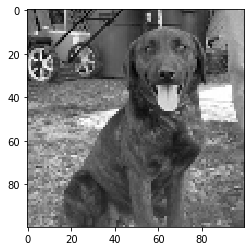

Category: 0


In [51]:
for i in range(100,105):
    plt.imshow(X[i], cmap = 'gray')
    plt.show()
    print('Category:', y[i])

In [54]:
print(len(X))
print(len(y))

print(X.shape)
print(y.shape)

24946
24946
(24946, 100, 100)
(24946,)


In [53]:
pickle_out = open('X.pkl', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pkl', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()